In [6]:
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_predict


In [7]:
df=pd.read_csv("ONLINE EDUCATION SYSTEM REVIEW.csv")


In [8]:
df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [10]:
df.isna().sum()

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

In [11]:
df.drop_duplicates()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good


In [12]:
df = df.rename(columns={'Home Location': 'Home_Location',
                        'Gender':'Gender',
                        'Level of Education': 'Level_of_Education',
                        'Age(Years)':'Age',
                        'Number of Subjects':'Number_of_Subjects',
                        'Device type used to attend classes':'Device_type',
                        'Economic status':'Economic_status',
                        'Family size':'Family_size',
                        'Internet facility in your locality':'Internet_availability',
                        'Are you involved in any sports?':'Involved_in_sports',
                        'Do elderly people monitor you?':'parental_monitoring',
                        'Study time (Hours)':'Studying_time',
                        'Sleep time (Hours)':'Sleeping_time',
                        'Time spent on social media (Hours)':'Time_on_social_media',
                        'Interested in Gaming?':'Gaming_interest',
                        'Have separate room for studying?':'separate_room',
                        'Engaged in group studies?':'group_studies',
                        "Average marks scored before pandemic in traditional classroom":"performance_in_offline",
                        'Your interaction in online mode':'Interaction_in_online_mode',
                        'Clearing doubts with faculties in online mode':'Expectation_Vs_Reality',
                        'Interested in?':'Favourite_field',
                        'Performance in online':'Performance_in_online',
                        'Your level of satisfaction in Online Education':'Satisfaction_With_Online_Education'})

In [13]:
df.isna().sum()

Gender                                0
Home_Location                         0
Level_of_Education                    0
Age                                   0
Number_of_Subjects                    0
Device_type                           0
Economic_status                       0
Family_size                           0
Internet_availability                 0
Involved_in_sports                    0
parental_monitoring                   0
Studying_time                         0
Sleeping_time                         0
Time_on_social_media                  0
Gaming_interest                       0
separate_room                         0
group_studies                         0
performance_in_offline                0
Interaction_in_online_mode            0
Expectation_Vs_Reality                0
Favourite_field                       0
Performance_in_online                 0
Satisfaction_With_Online_Education    0
dtype: int64

In [14]:
columns=df.iloc[20]
columns

Gender                                         Male
Home_Location                                 Urban
Level_of_Education                    Post Graduate
Age                                              24
Number_of_Subjects                               20
Device_type                                  Laptop
Economic_status                                Poor
Family_size                                       6
Internet_availability                             3
Involved_in_sports                               No
parental_monitoring                              No
Studying_time                                     8
Sleeping_time                                     8
Time_on_social_media                              2
Gaming_interest                                  No
separate_room                                    No
group_studies                                    No
performance_in_offline                        81-90
Interaction_in_online_mode                        2
Expectation_

In [15]:
df.columns

Index(['Gender', 'Home_Location', 'Level_of_Education', 'Age',
       'Number_of_Subjects', 'Device_type', 'Economic_status', 'Family_size',
       'Internet_availability', 'Involved_in_sports', 'parental_monitoring',
       'Studying_time', 'Sleeping_time', 'Time_on_social_media',
       'Gaming_interest', 'separate_room', 'group_studies',
       'performance_in_offline', 'Interaction_in_online_mode',
       'Expectation_Vs_Reality', 'Favourite_field', 'Performance_in_online',
       'Satisfaction_With_Online_Education'],
      dtype='object')

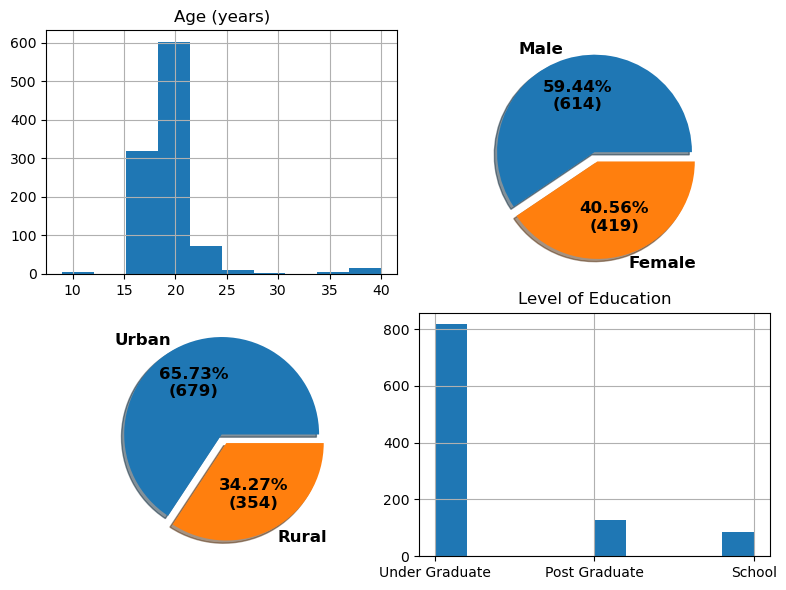

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

df['Age'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Age (years)')


gender = df['Gender'].value_counts().keys().tolist()
students_gender = df['Gender'].value_counts().tolist()
axes[0,1].pie(students_gender, explode = (0,0.1),labels = gender,shadow=True,autopct=lambda x: f'{x:,.2f}%\n({x * sum(students_gender)/100:.0f})',textprops={'fontsize':12,'weight':'bold'})


regions = df['Home_Location'].value_counts().keys().tolist()
students_in_regions = df['Home_Location'].value_counts().tolist()
axes[1,0].pie(students_in_regions, explode = (0,0.1),labels = regions,shadow=True,autopct=lambda x: f'{x:,.2f}%\n({x * sum(students_in_regions)/100:.0f})',textprops={'fontsize':12,'weight':'bold'})


df['Level_of_Education'].hist(ax=axes[1, 1])
axes[1, 1].set_title('Level of Education')


plt.tight_layout()
plt.show()

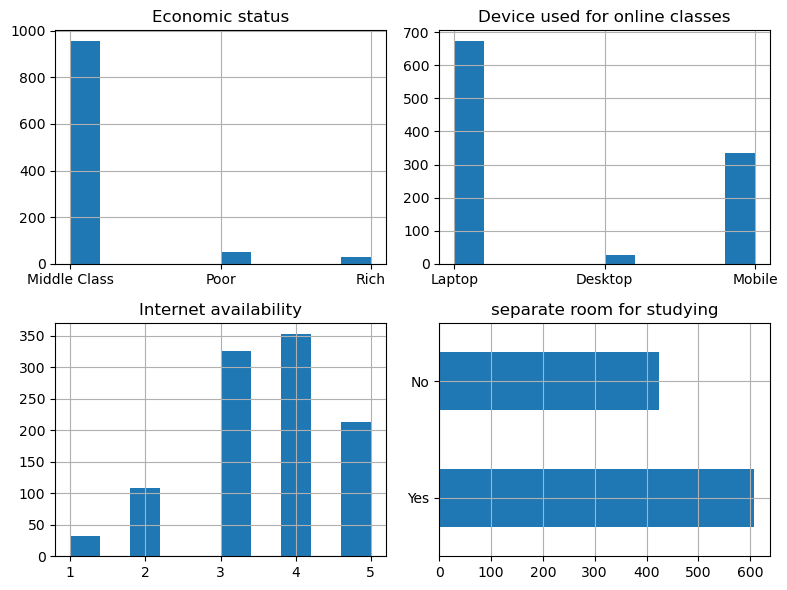

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

df['Economic_status'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Economic status')

df['Device_type'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Device used for online classes')

df['Internet_availability'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Internet availability')

"""df['Have separate room for studying?'].hist(ax=axes[1, 1])
axes[1, 1].set_title('Have separate room for studying?')"""
df['separate_room'].value_counts().plot.barh(ax=axes[1,1],grid=True)
axes[1, 1].set_title('separate room for studying')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

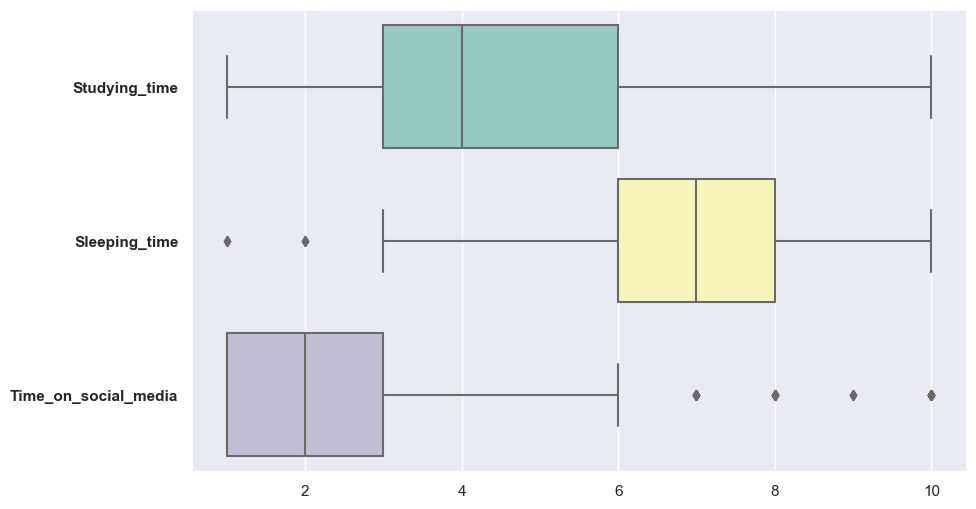

In [18]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.boxplot(data=df[['Studying_time','Sleeping_time','Time_on_social_media']],
             orient='h', palette='Set3')
plt.yticks(weight='bold')

plt.show()

## Level of education

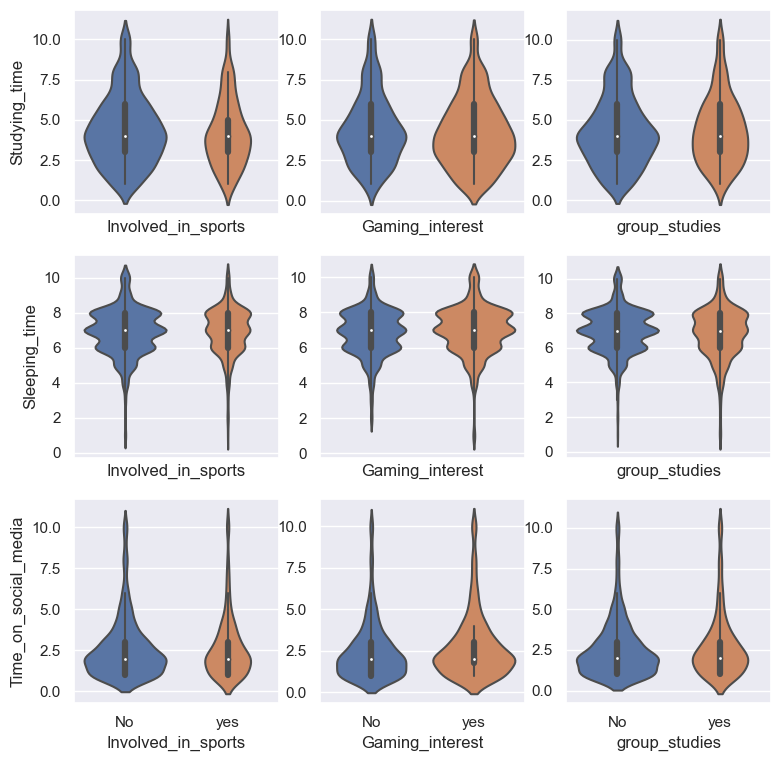

In [19]:
fig, ax = plt.subplots(3,3, figsize=(9,9),sharex=True)
sns.violinplot(x='Involved_in_sports',y='Studying_time', data=df, ax=ax[0,0],scale="count")
sns.violinplot(x='Gaming_interest', y='Studying_time', data=df, ax=ax[0,1],scale="count")
ax[0,1].set_ylabel("")
sns.violinplot(x='group_studies', y='Studying_time', data=df, ax=ax[0,2],scale="count")
ax[0,2].set_ylabel("")
sns.violinplot(x='Involved_in_sports', y='Sleeping_time', data=df, ax=ax[1,0],scale="count")
sns.violinplot(x='Gaming_interest', y='Sleeping_time', data=df, ax=ax[1,1],scale="count")
ax[1,1].set_ylabel("")
sns.violinplot(x='group_studies', y='Sleeping_time', data=df, ax=ax[1,2],scale="count")
ax[1,2].set_ylabel("")
sns.violinplot(x='Involved_in_sports', y='Time_on_social_media', data=df, ax=ax[2,0],scale="count")
sns.violinplot(x='Gaming_interest', y='Time_on_social_media', data=df, ax=ax[2,1],scale="count")
ax[2,1].set_ylabel("")
sns.violinplot(x='group_studies', y='Time_on_social_media', data=df, ax=ax[2,2],scale="count")
ax[2,2].set_ylabel("")
plt.show()

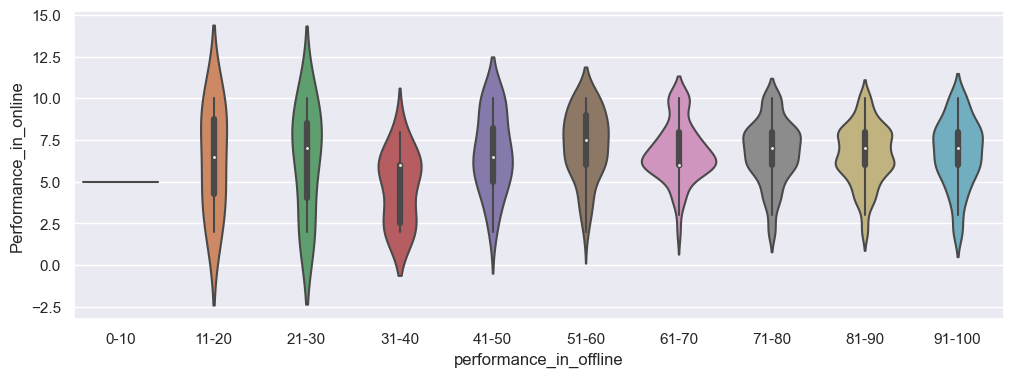

In [20]:

plt.figure(figsize=(12,4))
sns.violinplot(x='performance_in_offline', y='Performance_in_online', data=df,order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'])


plt.show()

In [21]:
df['performance_in_offline'] = df['performance_in_offline'].replace(['20-Nov'], '21-30')
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']])
df[['performance_in_offline']] = enc.fit_transform(df[['performance_in_offline']])

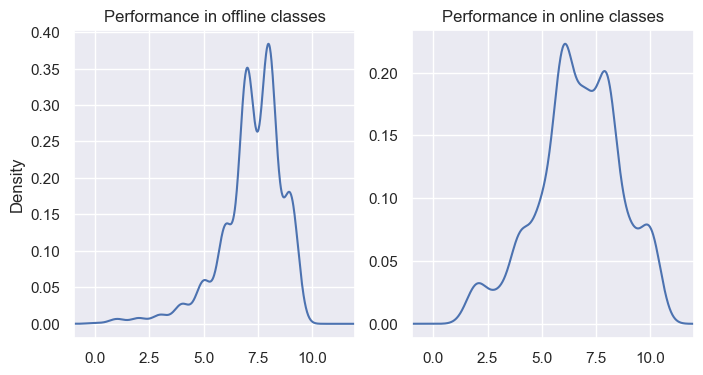

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
#sns.displot(df, x="performance_in_offline", kind="kde",ax=axes[0])
df['performance_in_offline'].plot.density(ax=axes[0])
axes[0].set_title('Performance in offline classes')

#sns.displot(df, x="Performance_in_online", kind="kde",ax=axes[1])
df['Performance_in_online'].plot.density(ax=axes[1])
axes[1].set_title('Performance in online classes')
axes[0].set_xlim(-1,12)
axes[1].set_xlim(-1,12)
axes[1].set_ylabel("")
plt.show()

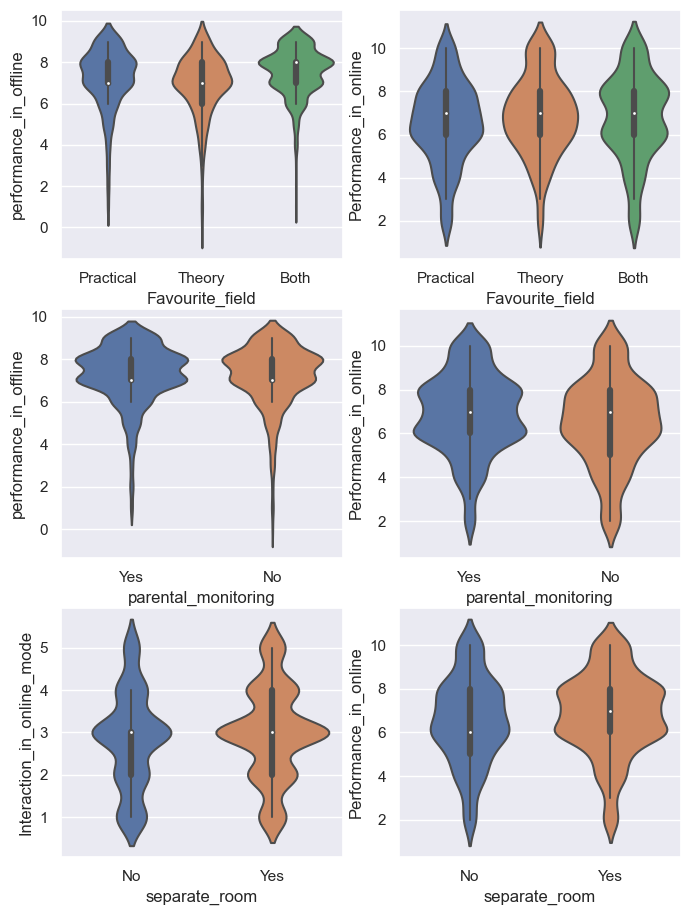

In [23]:
fig, ax = plt.subplots(3,2, figsize=(8,11))
sns.violinplot(x='Favourite_field', y='Performance_in_online', data=df, ax=ax[0,1],scale="area")
sns.violinplot(x='Favourite_field', y='performance_in_offline', data=df, ax=ax[0,0],scale="area")
sns.violinplot(x='parental_monitoring', y='Performance_in_online', data=df, ax=ax[1,1],scale="count")
sns.violinplot(x='parental_monitoring', y='performance_in_offline', data=df, ax=ax[1,0],scale="count")
sns.violinplot(x='separate_room', y='Performance_in_online', data=df, ax=ax[2,1],scale="count")
sns.violinplot(x='separate_room', y='Interaction_in_online_mode', data=df, ax=ax[2,0],scale="count")

plt.show()

C:\Users\majdw\AppData\Local\Temp\ipykernel_3892\4274462998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


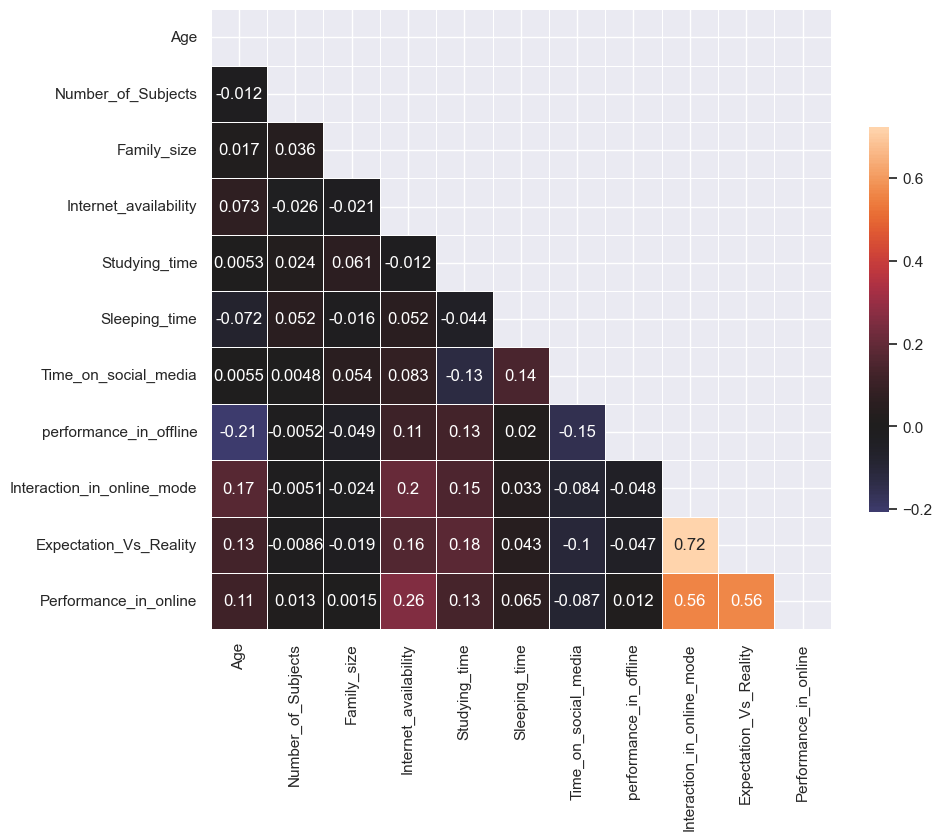

In [24]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()

# Feature engineering 
## encoding categorical features

In [25]:
columns=df.iloc[20]
columns

Gender                                         Male
Home_Location                                 Urban
Level_of_Education                    Post Graduate
Age                                              24
Number_of_Subjects                               20
Device_type                                  Laptop
Economic_status                                Poor
Family_size                                       6
Internet_availability                             3
Involved_in_sports                               No
parental_monitoring                              No
Studying_time                                     8
Sleeping_time                                     8
Time_on_social_media                              2
Gaming_interest                                  No
separate_room                                    No
group_studies                                    No
performance_in_offline                          8.0
Interaction_in_online_mode                        2
Expectation_

In [26]:
# display the values of the target column sat_lv (Your level of satisfaction in Online Education)
count = df['Satisfaction_With_Online_Education'].value_counts()

In [27]:
# encode the the target column using OrdinalEncoder because the the values of the target column are ranked values 
# from bad to good.
enc = OrdinalEncoder(categories=[['Bad', 'Average','Good']])
df[["Satisfaction_With_Online_Education"]] = enc.fit_transform(df[["Satisfaction_With_Online_Education"]])

In [28]:
# separate the features from the original dataset
dataset=df.iloc[:,:-1]
y =df.iloc[:,-1]

In [29]:
# check the values of the categorical features one by one in order to encode them using the most suitable method
count = df['Gender'].value_counts()

print(count)

Male      614
Female    419
Name: Gender, dtype: int64


In [30]:
enc = OrdinalEncoder()
dataset[["Gender"]] = enc.fit_transform(dataset[["Gender"]])

In [31]:
count = df['Home_Location'].value_counts()

print(count)

Urban    679
Rural    354
Name: Home_Location, dtype: int64


In [32]:
enc = OrdinalEncoder()
dataset[["Home_Location"]] = enc.fit_transform(dataset[["Home_Location"]])

In [33]:
count = df['Level_of_Education'].value_counts()

print(count)

Under Graduate    817
Post Graduate     129
School             87
Name: Level_of_Education, dtype: int64


In [34]:
enc = OrdinalEncoder(categories=[['School', 'Under Graduate', 'Post Graduate']])
dataset[["Level_of_Education"]] = enc.fit_transform(dataset[["Level_of_Education"]])

In [35]:
count = df['Economic_status'].value_counts()

print(count)

Middle Class    954
Poor             49
Rich             30
Name: Economic_status, dtype: int64


In [36]:
enc = OrdinalEncoder(categories=[['Poor', 'Middle Class', 'Rich']])
dataset[["Economic_status"]] = enc.fit_transform(dataset[["Economic_status"]])

In [37]:
count = df['Involved_in_sports'].value_counts()

print(count)
count = df['parental_monitoring'].value_counts()

print(count)
count = df['Gaming_interest'].value_counts()

print(count)
count = df['separate_room'].value_counts()

print(count)
count = df['group_studies'].value_counts()

print(count)

No     663
Yes    370
Name: Involved_in_sports, dtype: int64
Yes    545
No     488
Name: parental_monitoring, dtype: int64
Yes    560
No     473
Name: Gaming_interest, dtype: int64
Yes    608
No     425
Name: separate_room, dtype: int64
No     616
yes    417
Name: group_studies, dtype: int64


In [38]:
enc = OrdinalEncoder(categories=[['No', 'Yes']])
dataset[['Involved_in_sports']] = enc.fit_transform(dataset[['Involved_in_sports']])
dataset[['parental_monitoring']] = enc.fit_transform(dataset[['parental_monitoring']])
dataset[['Gaming_interest']] = enc.fit_transform(dataset[['Gaming_interest']])
dataset[['separate_room']] = enc.fit_transform(dataset[['separate_room']])
enc = OrdinalEncoder(categories=[['No', 'yes']])
dataset[['group_studies']] = enc.fit_transform(dataset[['group_studies']])

In [39]:
# of the feature "interested_in" we will use the OneHotEncoder because the values of this feature correspond to unranked
# values or in other words each value of those values ('Practical','Theory','Both') must be treated as feature on its own.
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(categories=[['Practical','Theory','Both']])
# transforming the column after fitting
ohe = ohe.fit_transform(dataset[['Favourite_field']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(ohe, columns=['Practical','Theory','Both'])
# drop one of the three columns created by the OneHotEncoder in order to avoide the dummy value trap
encoded_colm = encoded_colm.drop('Both', axis=1)
dataset = pd.concat([dataset, encoded_colm], axis=1)
# removing the encoded column.
dataset = dataset.drop(['Favourite_field'], axis=1)

In [40]:
# of the feature "interested_in" we will use the OneHotEncoder because the values of this feature correspond to unranked
# values or in other words each value of those values ('Practical','Theory','Both') must be treated as feature on its own.

ohe = OneHotEncoder(categories=[['Mobile', 'Laptop', 'Desktop']])
# transforming the column after fitting
ohe = ohe.fit_transform(dataset[['Device_type']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(ohe, columns=['Mobile', 'Laptop', 'Desktop'])
# drop one of the three columns created by the OneHotEncoder in order to avoide the dummy value trap
encoded_colm = encoded_colm.drop('Desktop', axis=1)
dataset = pd.concat([dataset, encoded_colm], axis=1)
# removing the encoded column.
dataset = dataset.drop(['Device_type'], axis=1)

In [41]:
dataset

,Gender,Home_Location,Level_of_Education,Age,Number_of_Subjects,Economic_status,Family_size,Internet_availability,Involved_in_sports,parental_monitoring,...,separate_room,group_studies,performance_in_offline,Interaction_in_online_mode,Expectation_Vs_Reality,Performance_in_online,Practical,Theory,Mobile,Laptop
0,1.0,1.0,1.0,18,11,1.0,4,5,0.0,1.0,...,0.0,0.0,9.0,1,1,6,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,19,7,1.0,4,1,1.0,1.0,...,1.0,0.0,9.0,1,1,3,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,18,5,1.0,5,2,0.0,1.0,...,1.0,0.0,7.0,1,1,6,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,18,5,1.0,4,4,1.0,1.0,...,0.0,1.0,9.0,1,2,4,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,18,5,1.0,4,3,0.0,0.0,...,1.0,1.0,8.0,3,3,6,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.0,0.0,1.0,19,3,1.0,6,5,1.0,1.0,...,1.0,1.0,9.0,4,4,8,0.0,1.0,1.0,0.0
1029,0.0,0.0,1.0,20,6,1.0,3,1,0.0,0.0,...,1.0,0.0,7.0,5,5,10,0.0,1.0,0.0,0.0
1030,0.0,0.0,1.0,20,3,1.0,3,2,0.0,0.0,...,1.0,1.0,7.0,2,2,6,0.0,1.0,1.0,0.0
1031,0.0,0.0,1.0,19,6,1.0,2,3,1.0,0.0,...,0.0,0.0,6.0,3,3,6,0.0,0.0,1.0,0.0


In [42]:
# add the the target column to the features columns in order to get the full dataset
dataset['Satisfaction_With_Online_Education']=y.tolist()

In [43]:
dataset

,Gender,Home_Location,Level_of_Education,Age,Number_of_Subjects,Economic_status,Family_size,Internet_availability,Involved_in_sports,parental_monitoring,...,group_studies,performance_in_offline,Interaction_in_online_mode,Expectation_Vs_Reality,Performance_in_online,Practical,Theory,Mobile,Laptop,Satisfaction_With_Online_Education
0,1.0,1.0,1.0,18,11,1.0,4,5,0.0,1.0,...,0.0,9.0,1,1,6,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,19,7,1.0,4,1,1.0,1.0,...,0.0,9.0,1,1,3,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,18,5,1.0,5,2,0.0,1.0,...,0.0,7.0,1,1,6,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,18,5,1.0,4,4,1.0,1.0,...,1.0,9.0,1,2,4,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,18,5,1.0,4,3,0.0,0.0,...,1.0,8.0,3,3,6,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.0,0.0,1.0,19,3,1.0,6,5,1.0,1.0,...,1.0,9.0,4,4,8,0.0,1.0,1.0,0.0,1.0
1029,0.0,0.0,1.0,20,6,1.0,3,1,0.0,0.0,...,0.0,7.0,5,5,10,0.0,1.0,0.0,0.0,1.0
1030,0.0,0.0,1.0,20,3,1.0,3,2,0.0,0.0,...,1.0,7.0,2,2,6,0.0,1.0,1.0,0.0,1.0
1031,0.0,0.0,1.0,19,6,1.0,2,3,1.0,0.0,...,0.0,6.0,3,3,6,0.0,0.0,1.0,0.0,2.0


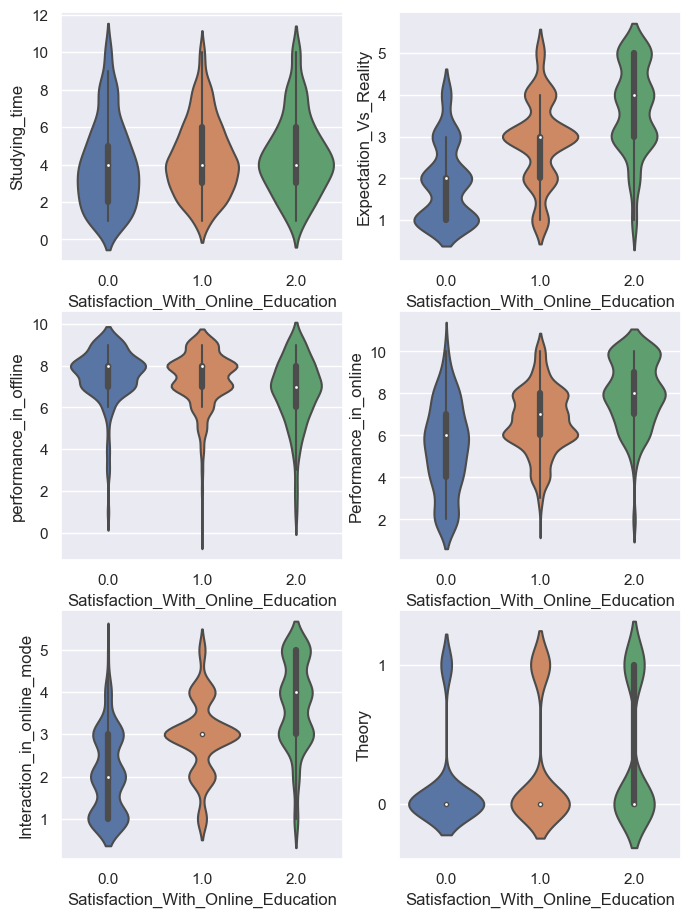

In [55]:
fig, ax = plt.subplots(3,2, figsize=(8,11))

sns.violinplot(x='Satisfaction_With_Online_Education', y='Studying_time', data=dataset,scale="area", ax=ax[0,0])
sns.violinplot(x='Satisfaction_With_Online_Education', y='performance_in_offline', data=dataset,scale="area", ax=ax[1,0])
sns.violinplot(x='Satisfaction_With_Online_Education', y='Interaction_in_online_mode', data=dataset,scale="area", ax=ax[2,0])
sns.violinplot(x='Satisfaction_With_Online_Education', y='Expectation_Vs_Reality', data=dataset,scale="area", ax=ax[0,1])
sns.violinplot(x='Satisfaction_With_Online_Education', y='Performance_in_online', data=dataset,scale="area", ax=ax[1,1])
sns.violinplot(x='Satisfaction_With_Online_Education', y='Theory', data=dataset,scale="area", ax=ax[2,1])
ax[2,1].set_yticks([0,1])


plt.show()

In [ ]:
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}

# feature selection:  
having 22 features in our dataset increases the error in our models in order to chose the best features we used 
the boruta algorithm in order to chose the best features.

In [45]:
T_y=dataset["Satisfaction_With_Online_Education"]
T_X=dataset.iloc[:,:-1]



Class=1, n=541 (52.372%)
Class=0, n=541 (52.372%)
Class=2, n=541 (52.372%)


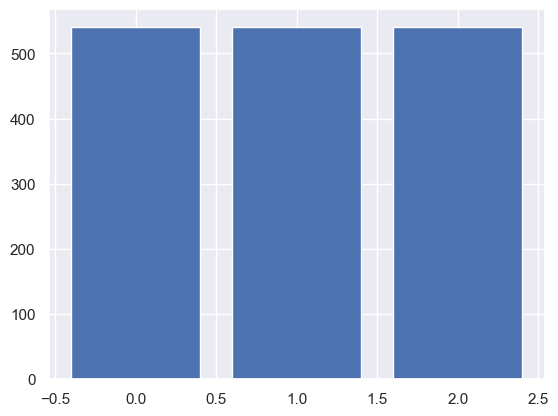

In [46]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# split into input and output elements
B_X, B_y =T_X, T_y
# transform the dataset
oversample = SMOTE()
B_X, B_y = oversample.fit_resample(B_X, B_y)
# summarize distribution
counter = Counter(B_y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [47]:
T_X, T_y = B_X, B_y

In [48]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import pandas as pd
import numpy as np


#  initialize a RandomForest model 
model = RandomForestClassifier(n_jobs=-1,n_estimators=1000, max_depth=5, random_state=42)

# initialize Boruta
feat_selector = BorutaPy(
    verbose=0,
    estimator=model,
    n_estimators='auto',
    max_iter=100,  # number of iterations to perform
    perc = 100
)

# train Boruta
# N.B.: T_X and T_y must be numpy arrays
feat_selector.fit(np.array(T_X), np.array(T_y))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", T_X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              T_X.columns[i], " - Ranking: ", feat_selector.ranking_[i])


------Support and Ranking for each feature------
Passes the test:  Gender  - Ranking:  1
Passes the test:  Home_Location  - Ranking:  1
Passes the test:  Level_of_Education  - Ranking:  1
Passes the test:  Age  - Ranking:  1
Passes the test:  Number_of_Subjects  - Ranking:  1
Doesn't pass the test:  Economic_status  - Ranking:  3
Doesn't pass the test:  Family_size  - Ranking:  2
Passes the test:  Internet_availability  - Ranking:  1
Passes the test:  Involved_in_sports  - Ranking:  1
Passes the test:  parental_monitoring  - Ranking:  1
Passes the test:  Studying_time  - Ranking:  1
Passes the test:  Sleeping_time  - Ranking:  1
Passes the test:  Time_on_social_media  - Ranking:  1
Passes the test:  Gaming_interest  - Ranking:  1
Passes the test:  separate_room  - Ranking:  1
Passes the test:  group_studies  - Ranking:  1
Passes the test:  performance_in_offline  - Ranking:  1
Passes the test:  Interaction_in_online_mode  - Ranking:  1
Passes the test:  Expectation_Vs_Reality  - Ranki

In [49]:
feat_selector.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

the features that passed the boruta algorithm will be used to builds the models

In [69]:
# filter the dataset and select only the features that are important for Boruta
X_filtered=feat_selector.transform(np.array (T_X),weak=False)

In [70]:
print("\n------the shape of the selected features------\n")
print(X_filtered.shape)



------the shape of the selected features------

(1623, 22)


In [71]:
from sklearn.feature_selection import SelectKBest
# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X



In [194]:

#we will test the performance of the data sets using k = 6, 8 , 9 ,11 for each of the three methods
New_X = featureSelect_dataframe(T_X, T_y, chi2, 12)
#New_X = featureSelect_dataframe(T_X, T_y, f_classif, 12)
New_X.keys()

Index(['Gender', 'Home_Location', 'Age', 'Studying_time',
       'performance_in_offline', 'Interaction_in_online_mode',
       'Expectation_Vs_Reality', 'Performance_in_online', 'Practical',
       'Theory', 'Mobile', 'Laptop'],
      dtype='object')

In [73]:
T_y=B_y
T_X=B_X
#we will test the performance of the data sets using k = 6, 8 , 9 ,11 for each of the three methods
New_X = featureSelect_dataframe(T_X, T_y, f_classif, 8)
#New_X = featureSelect_dataframe(T_X, T_y, f_classif, 12)
New_X.keys()

Index(['Gender', 'performance_in_offline', 'Interaction_in_online_mode',
       'Expectation_Vs_Reality', 'Performance_in_online', 'Theory', 'Mobile',
       'Laptop'],
      dtype='object')

In [74]:
T_y=B_y
T_X=B_X
#we will test the performance of the data sets using k = 6, 8 , 9 ,11 for each of the three methods
New_X = featureSelect_dataframe(T_X, T_y, mutual_info_classif, 8)
#New_X = featureSelect_dataframe(T_X, T_y, f_classif, 12)
New_X.keys()

Index(['parental_monitoring', 'Gaming_interest', 'separate_room',
       'performance_in_offline', 'Interaction_in_online_mode',
       'Expectation_Vs_Reality', 'Performance_in_online', 'Theory'],
      dtype='object')

In [195]:
#X = X_filtered
X=New_X
y = T_y
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

"""# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)"""

'# Principal Component Analysis\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=6)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)'

# Random Forest Classification


In [197]:

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print(balanced_accuracy)

[[96 11  2]
 [25 70 13]
 [11 22 75]]
0.741108845848907


In [198]:
# Classification Report 
#print("____________Random forest classifier - Boruta algorithm_________")
print("___________Random forest classifier - Chi-squared algorithm________")
print("____________Classification Report for the test set_________")
results_log = classification_report(y_test, y_pred,target_names=['Bad',"Average",'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
print("____________Classification Report for the training set_________")
results_log = classification_report(y_train, classifier.predict(X_train),target_names=['Bad',"Average",'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

___________Random forest classifier - Chi-squared algorithm________
____________Classification Report for the test set_________
              precision    recall  f1-score     support
Bad            0.727273  0.880734  0.796680  109.000000
Average        0.679612  0.648148  0.663507  108.000000
Good           0.833333  0.694444  0.757576  108.000000
accuracy       0.741538  0.741538  0.741538    0.741538
macro avg      0.746739  0.741109  0.739254  325.000000
weighted avg   0.746679  0.741538  0.739431  325.000000
____________Classification Report for the training set_________
              precision    recall  f1-score      support
Bad            0.818575  0.877315  0.846927   432.000000
Average        0.740385  0.711316  0.725559   433.000000
Good           0.830549  0.803695  0.816901   433.000000
accuracy       0.797381  0.797381  0.797381     0.797381
macro avg      0.796503  0.797442  0.796463  1298.000000
weighted avg   0.796486  0.797381  0.796424  1298.000000


# Logistic Regression

In [137]:

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print(balanced_accuracy)

[[94 14  1]
 [25 59 24]
 [ 7 37 64]]
0.6670914033299354


In [143]:
# Classification Report
#print("___________Logistic regression classifier - Boruta algorithm________")
print("_______Logistic regression classifier - Chi-squared algorithm_______")

print("____________Classification Report for the test set_________")
results_log = classification_report(y_test, y_pred,target_names=['Bad',"Average",'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
print("____________Classification Report for the training set_________")
results_log = classification_report(y_train, classifier.predict(X_train),target_names=['Bad',"Average", 'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

_______Logistic regression classifier - Chi-squared algorithm_______
____________Classification Report for the test set_________
              precision    recall  f1-score     support
Bad            0.746032  0.862385  0.800000  109.000000
Average        0.536364  0.546296  0.541284  108.000000
Good           0.719101  0.592593  0.649746  108.000000
accuracy       0.667692  0.667692  0.667692    0.667692
macro avg      0.667166  0.667091  0.663677  325.000000
weighted avg   0.667408  0.667692  0.664096  325.000000
____________Classification Report for the training set_________
              precision    recall  f1-score      support
Bad            0.731183  0.787037  0.758082   432.000000
Average        0.512626  0.468822  0.489747   433.000000
Good           0.654462  0.660508  0.657471   433.000000
accuracy       0.638675  0.638675  0.638675     0.638675
macro avg      0.632757  0.638789  0.635100  1298.000000
weighted avg   0.632681  0.638675  0.635005  1298.000000


# K-Nearest Neighbors (K-NN)


In [151]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [5,7,9,11,13,15,20,23,24,25,26],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
# find the best score
g_res.best_score_

Fitting 3 folds for each of 66 candidates, totalling 198 fits


0.7064818378809911

In [152]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [153]:


# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'manhattan', algorithm = 'brute',weights= 'distance')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print(balanced_accuracy)

[[98 10  1]
 [25 61 22]
 [ 8 23 77]]
0.7256201155283724


In [154]:
# Classification Report 
#print("____________K-NN classifier - Boruta algorithm_________")
print("____________K-NN classifier - Chi-squared algorithm_________")

print("____________Classification Report for the test set_________")
results_log = classification_report(y_test, y_pred,target_names=['Bad',"Average", 'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
print("____________Classification Report for the training set_________")
results_log = classification_report(y_train, classifier.predict(X_train),target_names=['Bad',"Average", 'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

____________K-NN classifier - Chi-squared algorithm_________
____________Classification Report for the test set_________
              precision    recall  f1-score     support
Bad            0.748092  0.899083  0.816667  109.000000
Average        0.648936  0.564815  0.603960  108.000000
Good           0.770000  0.712963  0.740385  108.000000
accuracy       0.726154  0.726154  0.726154    0.726154
macro avg      0.722343  0.725620  0.720337  325.000000
weighted avg   0.722422  0.726154  0.720634  325.000000
____________Classification Report for the training set_________
              precision    recall  f1-score      support
Bad            1.000000  1.000000  1.000000   432.000000
Average        0.995402  1.000000  0.997696   433.000000
Good           1.000000  0.995381  0.997685   433.000000
accuracy       0.998459  0.998459  0.998459     0.998459
macro avg      0.998467  0.998460  0.998460  1298.000000
weighted avg   0.998466  0.998459  0.998459  1298.000000


# Support Vector Machine (SVM)

In [155]:

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',degree=3, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print(balanced_accuracy)

[[97 11  1]
 [24 68 16]
 [ 7 32 69]]
0.7194755917997507


In [156]:
# Classification Report 
#print("____________SVM classifier - Boruta algorithm_________")
print("____________SVM classifier - Chi-squared algorithm_________")

print("____________Classification Report for the test set_________")
results_log = classification_report(y_test, y_pred,target_names=['Bad',"Average" ,'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
print("____________Classification Report for the training set_________")
results_log = classification_report(y_train, classifier.predict(X_train),target_names=['Bad',"Average", 'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

____________SVM classifier - Chi-squared algorithm_________
____________Classification Report for the test set_________
              precision    recall  f1-score  support
Bad            0.757812  0.889908  0.818565   109.00
Average        0.612613  0.629630  0.621005   108.00
Good           0.802326  0.638889  0.711340   108.00
accuracy       0.720000  0.720000  0.720000     0.72
macro avg      0.724250  0.719476  0.716970   325.00
weighted avg   0.724353  0.720000  0.717283   325.00
____________Classification Report for the training set_________
              precision    recall  f1-score      support
Bad            0.822222  0.856481  0.839002   432.000000
Average        0.692130  0.690531  0.691329   433.000000
Good           0.793269  0.762125  0.777385   433.000000
accuracy       0.769646  0.769646  0.769646     0.769646
macro avg      0.769207  0.769712  0.769239  1298.000000
weighted avg   0.769166  0.769646  0.769185  1298.000000


# decision_tree_classification


In [157]:


from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini",random_state=42)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print(balanced_accuracy)

[[87 14  8]
 [29 56 23]
 [11 27 70]]
0.6549439347604485


In [159]:
# Classification Report 
#print("____________Decision tree classifier - Boruta algorithm_________")
print("__________Decision tree classifier - Chi-squared algorithm_______")

print("____________Classification Report for the test set_________")
results_log = classification_report(y_test, y_pred,target_names=['Bad',"Average", 'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
print("____________Classification Report for the training set_________")
results_log = classification_report(y_train, classifier.predict(X_train),target_names=['Bad', "Average",'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

__________Decision tree classifier - Chi-squared algorithm_______
____________Classification Report for the test set_________
              precision    recall  f1-score     support
Bad            0.685039  0.798165  0.737288  109.000000
Average        0.577320  0.518519  0.546341  108.000000
Good           0.693069  0.648148  0.669856  108.000000
accuracy       0.655385  0.655385  0.655385    0.655385
macro avg      0.651809  0.654944  0.651162  325.000000
weighted avg   0.651912  0.655385  0.651427  325.000000
____________Classification Report for the training set_________
              precision    recall  f1-score      support
Bad            1.000000  1.000000  1.000000   432.000000
Average        0.995402  1.000000  0.997696   433.000000
Good           1.000000  0.995381  0.997685   433.000000
accuracy       0.998459  0.998459  0.998459     0.998459
macro avg      0.998467  0.998460  0.998460  1298.000000
weighted avg   0.998466  0.998459  0.998459  1298.000000


# Naive Bayes


In [160]:

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print(balanced_accuracy)


[[91 16  2]
 [31 59 18]
 [ 8 47 53]]
0.6239664741193793


In [161]:
# Classification Report 
#print("____________Naive Bayes classifier - Boruta algorithm_________")
print("____________Naive Bayes classifier - Chi-squared algorithm_________")

print("____________Classification Report for the test set_________")
results_log = classification_report(y_test, y_pred,target_names=['Bad',"Average",'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
print("____________Classification Report for the training set_________")
results_log = classification_report(y_train, classifier.predict(X_train),target_names=['Bad',"Average", 'Good'], output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

____________Naive Bayes classifier - Chi-squared algorithm_________
____________Classification Report for the test set_________
              precision    recall  f1-score     support
Bad            0.700000  0.834862  0.761506  109.000000
Average        0.483607  0.546296  0.513043  108.000000
Good           0.726027  0.490741  0.585635  108.000000
accuracy       0.624615  0.624615  0.624615    0.624615
macro avg      0.636545  0.623966  0.620062  325.000000
weighted avg   0.636740  0.624615  0.620497  325.000000
____________Classification Report for the training set_________
              precision    recall  f1-score      support
Bad            0.690335  0.810185  0.745474   432.000000
Average        0.487859  0.510393  0.498871   433.000000
Good           0.701183  0.547344  0.614786   433.000000
accuracy       0.622496  0.622496  0.622496     0.622496
macro avg      0.626459  0.622641  0.619710  1298.000000
weighted avg   0.626410  0.622496  0.619614  1298.000000
